In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def load_datasets(filename):
    
    df = pd.read_csv(filename, delimiter=',')
    X, y = df["A"], df["B"]
    return X, y

In [4]:
def split_datasets(X, y, test_size = 0.2):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [5]:
def plot_data(X_train, X_test, y_train, y_test):
    
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [6]:
def normalize(X):
    
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0, ddof=1)
    X_norm = (X - mean) / std
    return X_norm, mean, std

In [7]:
def prepare_X(X):

    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [8]:
def hypothesis(X, theta):
    
    h_thetha = X.dot(theta);
    return h_thetha

In [9]:
def cost_function(X, y, theta):
   
    m = X.shape[0]
    J = 0
    if m == 0:
        return None
    else:
        J = np.sum(((hypothesis(X, theta) - y) ** 2))
        return J/(2*m)

In [10]:
def normal_eqn(X, y):
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [11]:
def derivative(X, y, theta):
    
    m = X.shape[0]
    #d_t1 = (-2/m) * (X.dot(y - hypothesis(X, theta)))
    #d_t2 = (-2/m)*  (X - hypothesis(X, theta))
    d_thetha = (-2/m)*(y - hypothesis(X, theta) )
    #d_thtetha.append(d_t1)
    #d_thtetha.append(d_t2)
    return d_thetha

In [12]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        theta = theta -(1/m)*alpha*( X.T.dot((hypothesis(X, theta) - y)))
        
        #theta = theta - alpha / m * ((hypothesis(X, theta) - y))
        J = cost_function(X, y, theta)
        ######################
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [13]:
def plot_J(X, y):

    theta_0 = np.linspace(-10, 10, 100)
    theta_1 = np.linspace(-1, 4, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

In [14]:
X, y = load_datasets('burrito.csv')
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97,), y=(97,)


In [15]:
X_train, X_test, y_train, y_test = split_datasets(X, y, 0.2)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77,), y=(77,)
Test set: X=(20,), y=(20,)


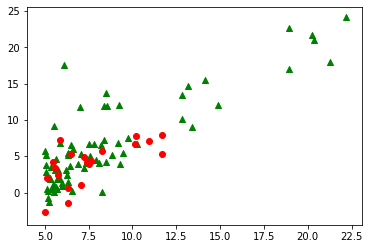

In [16]:
plot_data(X_train, X_test, y_train, y_test)

In [17]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0])

In [18]:
y = y_train[:]

In [19]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (77, 2)
y: (77,)
37.236607268014936


In [20]:
alpha = 0.02
num_iters = 1500

In [21]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))
theta_res = normal_eqn(X, y)
print('Theta 0: {}; Theta 1: {}'.format(theta_res[0],theta_res[1]))

Theta 0: 6.312759610389174; Theta 1: 5.043599078225417
Theta 0: 6.3127596103896115; Theta 1: 5.043599078225935


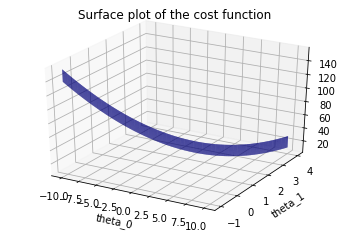

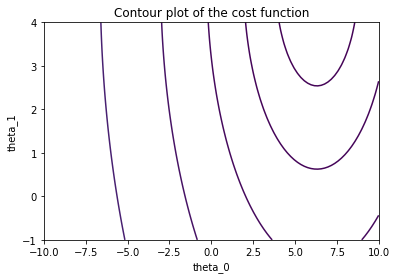

In [22]:
plot_J(X, y)

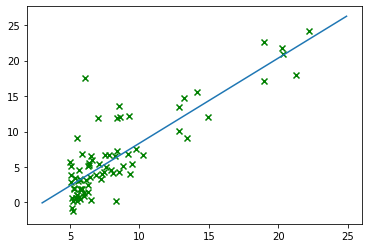

In [23]:
x = np.arange(3, 25, 0.1)
h = (new_theta[0] + (new_theta[1])*(x - mean)/std)
plt.plot(x, h)
plt.scatter(X_train, y_train, marker='x', c='green')
plt.show()

In [26]:
####################
# Нормалізувати тестовий датасет, використовуючи mean, std з тренувального
####################
X_test_proc = (X_test_proc - mean) / std
X_test_proc = prepare_X((X_test - mean)/std)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) *100
diff = np.abs(y_test - y_test_pred)
res = pd.DataFrame({'X' : X_test, 'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : diff})
print(res)
print(cost_function(X_test_proc, y_test, new_theta))

          X  y_actual     y_pred       err
76   7.5386   3.88450   5.392290  1.507790
48  11.7000   8.00430  10.393038  2.388738
52   7.4239   4.28850   5.254455  0.965955
66   8.2951   5.74420   6.301375  0.557175
65   7.2182   4.88520   5.007266  0.122066
74   5.0269  -2.68070   2.373984  5.054684
43   5.7737   2.44060   3.271412  0.830812
37   5.6063   3.39280   3.070248  0.322552
84   6.5159   5.34360   4.163313  1.180287
79   5.1077   2.05760   2.471081  0.413481
55   6.3589  -1.42110   3.974646  5.395746
92   5.8707   7.20290   3.387977  3.814923
45   7.0931   1.04630   4.856933  3.810633
42  11.7080   5.38540  10.402651  5.017251
82   6.3557   0.67861   3.970801  3.292191
91   7.6366   4.29590   5.510056  1.214156
22   5.4901   4.26300   2.930611  1.332389
70  10.1360   6.67990   8.513581  1.833681
67  10.2360   7.77540   8.633751  0.858351
27  10.9570   7.04670   9.500176  2.453476
3.6178544140020508
